In [1]:
from fastai.vision import *

In [2]:
import numpy as np
import cv2

In [3]:
learn = load_learner(Path('./model/v4'))

cap = cv2.VideoCapture(0)
s = ' '
i = 0

tensor(27)
tensor(1)


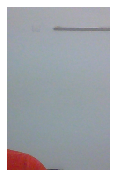

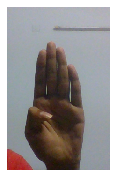

In [4]:
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # frame = cv2.flip(frame, 1)
    key = cv2.waitKey(1)
    if key == ord('q') or i == 100:
        break
    if i % 50 == 0:
        # t = torch.tensor(np.ascontiguousarray(np.flip(frame, 2)).transpose(2,0,1)).float()/255
        t = torch.tensor(np.ascontiguousarray(np.flip(frame[50:400, 230:450], 2)).transpose(2, 0, 1)).float()/255
        img = Image(t) # fastai.vision.Image, not PIL.Image
        img.show()
        
        pred, pred_idx, _ = learn.predict(img)
        print(pred_idx)
        s1 = str(pred)
        if s1 == 'nothing':
            s += ''
        elif s1 == 'space':
            if s[-1] != ' ':
                s += ' '
        elif s1 == 'del':
            s = s[:-1]
        else:
            s += str(pred) if str(pred) != s[-1] else ''

    if i == 200:
        break
    i += 1
    frame = cv2.flip(frame, 1)
    frame = cv2.putText(frame, s, (25, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    # Display the resulting frame
    # cv2.imshow('frame', frame)

cap.release()
cv2.destroyAllWindows()